#Analyze associations 


In [1]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw972'))
from uw.like2.analyze import (sourceinfo, associations, ); 
map(reload, (sourceinfo, associations,));

In [2]:
self = associations.Associations()

loading sources.pickle
using associations found in sourceinfo
associated: 2281/6568


In [3]:
df = self.df
assoc = df.aprob>0.8; sum(assoc)
dfa = df[assoc]; len(dfa)

2326

In [4]:
agn = [ n in ('crates bzcat bllac agn').split() for n in dfa.acat]; 
print 'agns:', sum(agn)
dfagn = dfa[agn]

agns: 1669


###Look for cases where the second or third association is above 0.8, and is 'bzcat'

In [5]:
test=[-1]* len(dfagn)
bzname=[]; bzts=[]; bzsname=[]
for i,a in enumerate(dfagn.associations):
    prob = a['prob']
    for j,p in enumerate(prob):
        if p>0.8 and a['cat'][j]=='bzcat':
            test[i]=j
            bzname.append(a['name'][j])
            bzts.append(dfagn.ts[i])
            bzsname.append(dfagn.index[i])
            
t=np.asarray(test)
u =[sum(t==k) for k in range(-1,3)] ; print u
print 'There is a BZCAT association in all but %d out of %d agns' % (u[0], sum(u))

[446, 993, 219, 11]
There is a BZCAT association in all but 446 out of 1669 agns


In [6]:
dd=dict([(name, dict(ts=ts, sname=sname)) for name,ts,sname in zip(np.array(bzname), bzts,bzsname)])
bzdf = pd.DataFrame(dd).T.sort_index()
bzdf['type'] = [n[3] for n in bzdf.index]

In [7]:
types=set(bzdf.type)
tc = [sum(bzdf.type==type) for type in types]
dict(zip(types, tc))

{'B': 713, 'G': 81, 'Q': 347, 'U': 78}

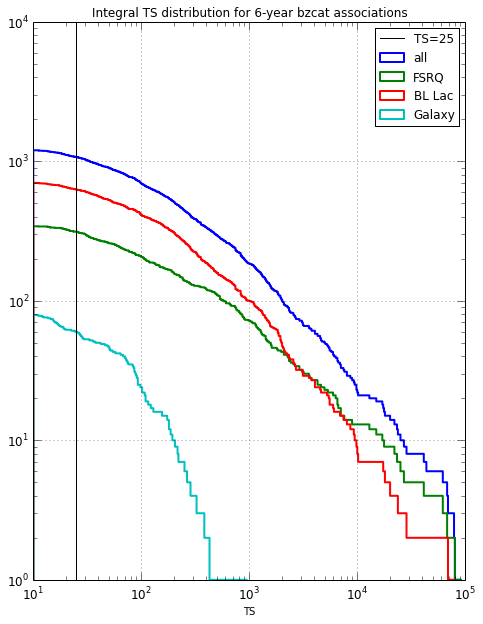

In [8]:
# make an integral logTS plot 
fig, ax = plt.subplots(figsize=(8,10))
tsmax=100000
hist_args=dict(cumulative=-1, lw=2, histtype='step', log=True)
dom= np.logspace(1,np.log10(tsmax),501)
ax.hist(bzdf.ts, dom, label='all', **hist_args );
ax.hist(bzdf.ts[bzdf.type=='Q'], dom, label='FSRQ', **hist_args)
ax.hist(bzdf.ts[bzdf.type=='B'], dom, label='BL Lac', **hist_args)
ax.hist(bzdf.ts[bzdf.type=='G'], dom, label='Galaxy', **hist_args)
plt.setp(ax, xscale='log', xlabel='TS', ylim=(1,None), xlim=(10, tsmax),
        title='Integral TS distribution for 6-year bzcat associations')
ax.grid(True, alpha=0.8);
ax.axvline(25, color='k', label='TS=25')
ax.legend();

In [9]:
pwd

u'/nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_6years/uw972'